In [2]:
"""
fbprophet
"""
from fbprophet import Prophet
import pandas as pd
import numpy as np

# np.set_printoptions(precision=3, suppress=True)
# np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# #设置value的显示长度为100，默认为50
# pd.set_option('max_colwidth',100)

# # 设置输出数据的格式
# pd.set_option('precision', 5) #设置精度
# # 为了直观的显示数字，不采用科学计数法
# pd.set_option('display.float_format', lambda x: '%.5f' % x) 

path = '/home/hadoop/data_school/sparkMlib/TotalFee.csv'
df = pd.read_csv(path)
df.head()

,RegisterDate,TotalFee
0,2017/1/1,215839.57
1,2017/1/2,117902.76
2,2017/1/3,3661451.26
3,2017/1/4,3319719.68
4,2017/1/5,2354617.63


In [3]:
df.columns = ['ds', 'y']
df.head()

conn = pymysql.connect(host='localhost', user='warren', password='123456', db='spark',
                         port=3306, charset='utf8')

cur = conn.cursor()


,ds,y
0,2017/1/1,215839.57
1,2017/1/2,117902.76
2,2017/1/3,3661451.26
3,2017/1/4,3319719.68
4,2017/1/5,2354617.63


In [3]:
df.columns = ['ds', 'y']
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2017/1/1,12.282291
1,2017/1/2,11.677615
2,2017/1/3,15.113370
3,2017/1/4,15.015391
4,2017/1/5,14.671889


In [4]:
# 划分测试集和训练集
df['ds'] = pd.to_datetime(df['ds'], format="%Y/%m/%d")
df_train = df.loc[df.ds < "2019-06-01"].copy()
df_test = df.loc[df.ds >= "2019-06-01"].copy()

In [5]:
# 加入部分holidays
guoqing = pd.DataFrame({
  'holiday': 'guoqing',
#   'ds': pd.to_datetime(['2017-10-01', '2018-10-01', '2019-10-01']),
  'ds': pd.to_datetime(['2017-10-01', '2018-10-01']),
  'lower_window': 0,
  'upper_window': 7,
})
yuandan = pd.DataFrame({
  'holiday': 'yuandan',
  'ds': pd.to_datetime(['2017-01-01', '2018-01-01', '2019-01-01']),
  'lower_window': 0,
  'upper_window': 1,
})
cunjie01 = pd.DataFrame({
    'holiday': 'cunjie',
    'ds': pd.to_datetime(['2017-01-27']),
    'lower_window': 0,
    'upper_window': 7,
})
cunjie02 = pd.DataFrame({
    'holiday': 'cunjie',
    'ds': pd.to_datetime(['2018-02-15']),
    'lower_window': 0,
    'upper_window': 7,
})
cunjie03 = pd.DataFrame({
    'holiday': 'cunjie',
    'ds': pd.to_datetime(['2019-02-04']),
    'lower_window': 0,
    'upper_window': 7,
})
qingming01 = pd.DataFrame({
    'holiday': 'qingming',
    'ds': pd.to_datetime(['2017-04-02']),
    'lower_window': 0,
    'upper_window': 3,
})
qingming02 = pd.DataFrame({
    'holiday': 'qingming',
    'ds': pd.to_datetime(['2018-04-05', '2019-04-05']),
    'lower_window': 0,
    'upper_window': 3,
})
laodong01 = pd.DataFrame({
    'holiday': 'laodong',
    'ds': pd.to_datetime(['2017-05-01', '2019-05-01']),
    'lower_window': 0,
    'upper_window': 3,
})
laodong02 = pd.DataFrame({
    'holiday': 'cunjie',
    'ds': pd.to_datetime(['2018-04-29']),
    'lower_window': 0,
    'upper_window': 3,
})
holiday = [guoqing, yuandan, cunjie01, cunjie02, cunjie03, qingming01, qingming02, laodong01, laodong02]
holidays = pd.concat(holiday)
holidays

,holiday,ds,lower_window,upper_window
0,guoqing,2017-10-01,0,7
1,guoqing,2018-10-01,0,7
0,yuandan,2017-01-01,0,1
1,yuandan,2018-01-01,0,1
2,yuandan,2019-01-01,0,1
0,cunjie,2017-01-27,0,7
0,cunjie,2018-02-15,0,7
0,cunjie,2019-02-04,0,7
0,qingming,2017-04-02,0,3
0,qingming,2018-04-05,0,3


In [6]:
# 建立模型

m = Prophet(holidays=holidays, seasonality_mode='multiplicative', holidays_prior_scale=20, seasonality_prior_scale=0.3)
m.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
# 建立预测集
fday = 30
future = m.make_future_dataframe(periods=fday, freq='D')
future

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
...,...
897,2019-06-26
898,2019-06-27
899,2019-06-28
900,2019-06-29


In [9]:
# 预测

test = pd.DataFrame(df_test, columns=['ds'])
forecast = m.predict(df=future)
print(forecast)
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2017-01-01  14.640807   11.662304   12.926518    14.640807    14.640807   
1   2017-01-02  14.641718   13.136332   14.373079    14.641718    14.641718   
2   2017-01-03  14.642629   14.089606   15.303418    14.642629    14.642629   
3   2017-01-04  14.643541   14.105348   15.329010    14.643541    14.643541   
4   2017-01-05  14.644452   13.979294   15.239355    14.644452    14.644452   
..         ...        ...         ...         ...          ...          ...   
897 2019-06-26  14.841384   14.539579   15.778250    14.840785    14.841898   
898 2019-06-27  14.841152   14.371536   15.595509    14.840504    14.841706   
899 2019-06-28  14.840921   14.383838   15.605559    14.840219    14.841514   
900 2019-06-29  14.840690   13.012320   14.271568    14.839918    14.841332   
901 2019-06-30  14.840458   12.771925   13.982713    14.839618    14.841146   

     cunjie  cunjie_lower  cunjie_upper  guoqing  .

In [14]:
# data = np.array(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# columns = forecast.columns
# res=[]
# for c in columns:
#     d = df[c].values.toli
data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(data)

columns = data.columns
res = {}
for c in columns[1:]:
    d = data[c].values.tolist()[-30:]
    q = data[c].values.tolist()[:-30:10]
    d = [np.exp(x) for x in d]
    q = [np.exp(x) for x in q]
    d = q+d
    res[c+"_last"] = q
    res[c+"_future"] = d
res['ds_future'] = data['ds'].values.astype("M8[D]").tolist()[-30:]
res['ds_last'] = data['ds'].values.astype("M8[D]").tolist()[:-30:10]

res['ds_future'] = [t.strftime('%Y-%m-%d') for t in res['ds_future']]
res['ds_last'] = [t.strftime('%Y-%m-%d') for t in res['ds_last']]
# print(res['yhat'])


            ds       yhat  yhat_lower  yhat_upper
0   2017-01-01  12.297039   11.708213   12.908184
1   2017-01-02  13.799825   13.179498   14.386686
2   2017-01-03  14.687229   14.038837   15.260879
3   2017-01-04  14.693370   14.109392   15.291722
4   2017-01-05  14.616871   13.994650   15.248520
..         ...        ...         ...         ...
897 2019-06-26  15.140542   14.539722   15.807758
898 2019-06-27  14.991239   14.361399   15.636754
899 2019-06-28  14.998078   14.413009   15.633510
900 2019-06-29  13.655154   13.035431   14.258443
901 2019-06-30  13.391637   12.793295   14.005345

[902 rows x 4 columns]
{'yhat_last': [12.297038513718938, 15.119423220274737, 13.952642554857597, 13.414106736030881, 14.834952522679345, 15.582652408615095, 15.339385309544921, 13.646388176489744, 15.337070297776608, 14.037787284402473, 15.477274257498143, 15.237457176192514, 14.16392280844764, 15.313928343147188, 13.493951787857894, 15.09394274311018, 13.76909586558695, 15.229290842071002, 14.9

In [8]:
print(df_test[['ds', 'y']])

             ds          y
872  2019-06-01  13.857759
873  2019-06-02  13.829361
874  2019-06-03  15.659267
875  2019-06-04  15.412989
876  2019-06-05  15.280933
...         ...        ...
1079 2019-12-25  13.613138
1080 2019-12-26  11.099896
1081 2019-12-27  11.020419
1082 2019-12-28  10.014416
1083 2019-12-30  11.581151

[212 rows x 2 columns]


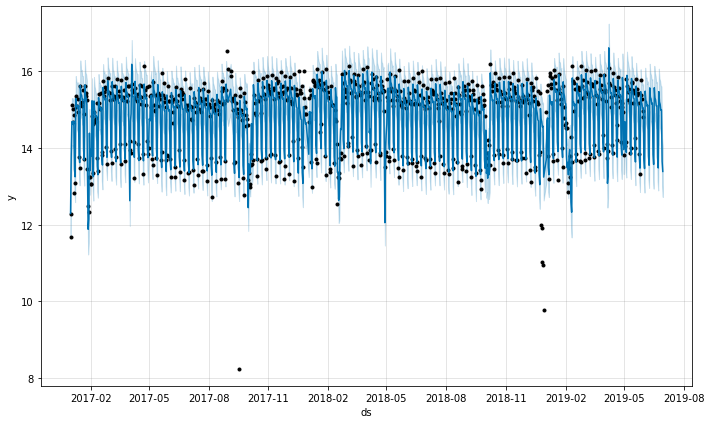

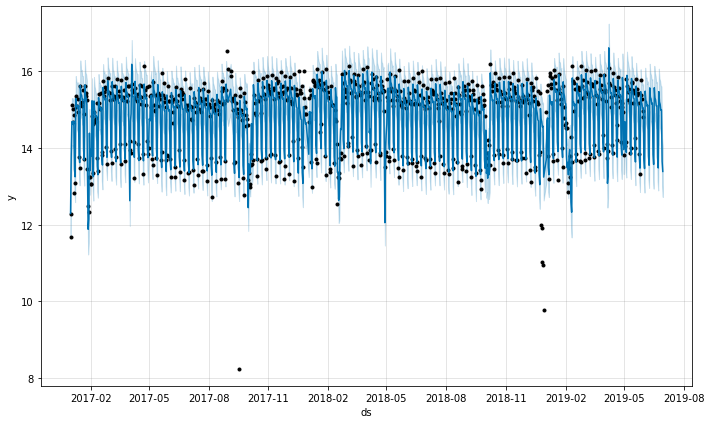

In [21]:
# 打印预测结果
m.plot(forecast)

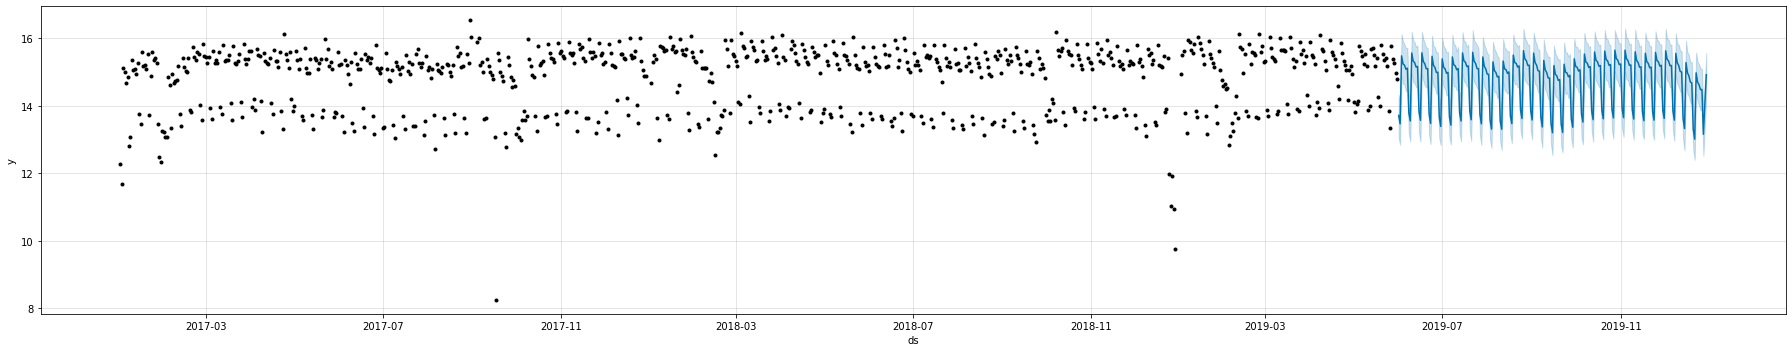

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(25)
fig = m.plot(forecast, ax = ax)

/home/hadoop/.conda/envs/spark/lib/python3.6/site-packages/fbprophet/plot.py:422: UserWarning:

FixedFormatter should only be used together with FixedLocator

/home/hadoop/.conda/envs/spark/lib/python3.6/site-packages/fbprophet/plot.py:422: UserWarning:

FixedFormatter should only be used together with FixedLocator

/home/hadoop/.conda/envs/spark/lib/python3.6/site-packages/fbprophet/plot.py:422: UserWarning:

FixedFormatter should only be used together with FixedLocator



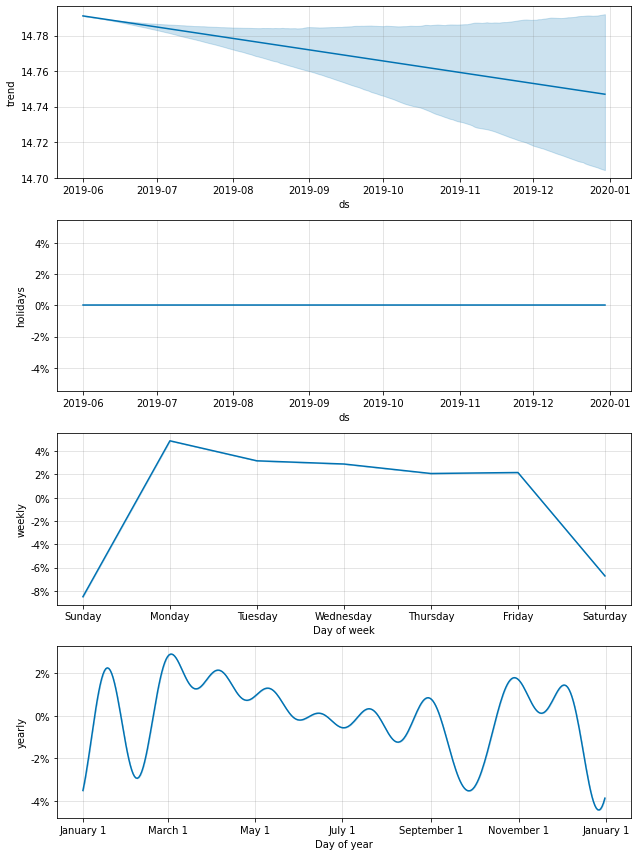

In [34]:
fig = m.plot_components(forecast)

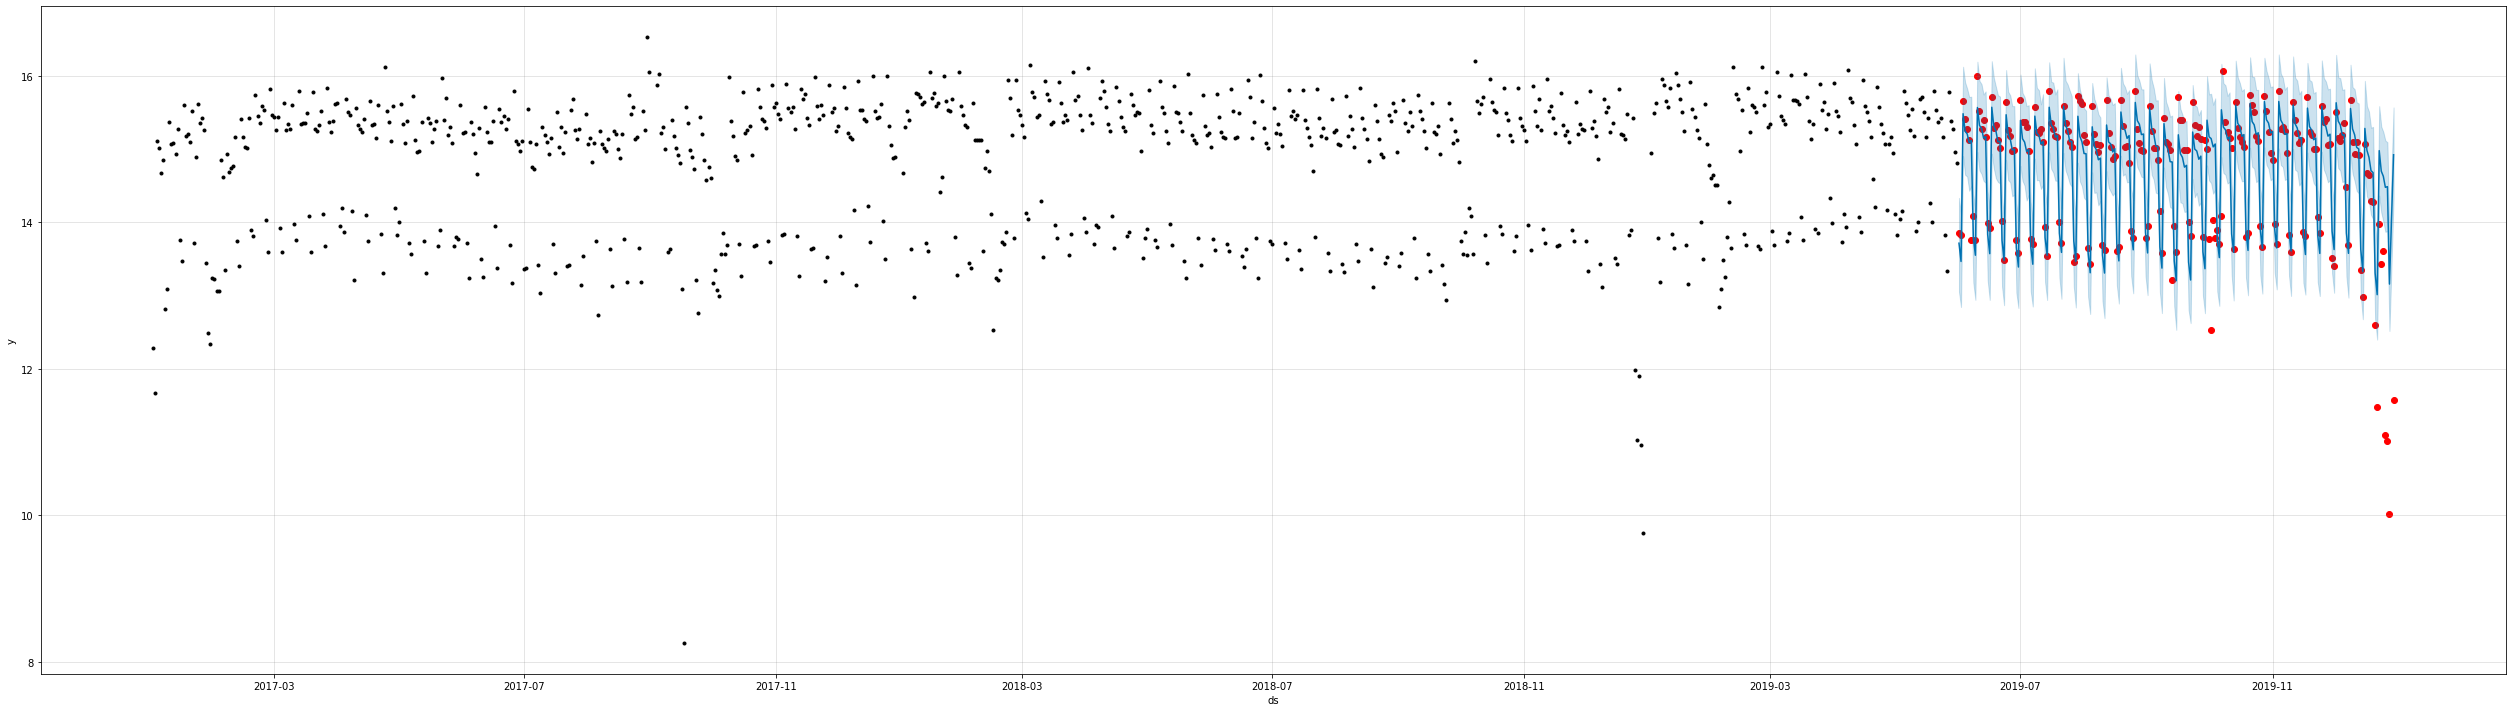

In [11]:
import matplotlib.dates as mdate
from matplotlib.pyplot import MultipleLocator
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(35)

ax.scatter(df_test['ds'], df_test['y'], color='r')
fig = m.plot(forecast, ax=ax)

In [138]:
forecast['yhat'] = np.exp(forecast['yhat'])
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,cunjie,...,yearly,yearly_lower,yearly_upper,yuandan,yuandan_lower,yuandan_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-01,14.94947,13.19303,14.35855,14.94947,14.94947,-1.14632,-1.14632,-1.14632,0.00000,...,-0.13265,-0.13265,-0.13265,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,987720.08179
1,2019-06-02,14.95018,12.99412,14.14264,14.95018,14.95018,-1.39467,-1.39467,-1.39467,0.00000,...,-0.12244,-0.12244,-0.12244,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,771050.70781
2,2019-06-03,14.95088,15.00782,16.20128,14.95088,14.95088,0.62829,0.62829,0.62829,0.00000,...,-0.11009,-0.11009,-0.11009,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5833739.41713
3,2019-06-04,14.95159,14.70483,15.95503,14.95159,14.95159,0.38955,0.38955,0.38955,0.00000,...,-0.09610,-0.09610,-0.09610,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4598001.02511
4,2019-06-05,14.95229,14.67194,15.88307,14.95229,14.95229,0.35768,0.35768,0.35768,0.00000,...,-0.08102,-0.08102,-0.08102,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4456938.87159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2019-12-25,15.09526,14.16827,15.58688,14.74286,15.43900,-0.19795,-0.19795,-0.19795,0.00000,...,-0.63666,-0.63666,-0.63666,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2949960.71905
208,2019-12-26,15.09596,14.02304,15.46093,14.74140,15.44268,-0.35071,-0.35071,-0.35071,0.00000,...,-0.65323,-0.65323,-0.65323,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2533855.51457
209,2019-12-27,15.09666,14.03012,15.47119,14.73830,15.44680,-0.34170,-0.34170,-0.34170,0.00000,...,-0.66234,-0.66234,-0.66234,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2558590.19475
210,2019-12-28,15.09737,12.71344,14.07795,14.73521,15.45161,-1.67730,-1.67730,-1.67730,0.00000,...,-0.66364,-0.66364,-0.66364,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,673379.66789


In [27]:

a = pd.DataFrame(np.arange(12).reshape(3, 4))

print(a)
b = pd.DataFrame(np.arange(20).reshape(4,5))
print(b)
c = a.sub(b)
c

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19


,0,1,2,3,4
0,0.0,0.0,0.0,0.0,NaN
1,-1.0,-1.0,-1.0,-1.0,NaN
2,-2.0,-2.0,-2.0,-2.0,NaN
3,NaN,NaN,NaN,NaN,NaN
